# Проект по Анализу данных 2023

__Тема:__ Исследование различных групп пациентов на наличие болезни сердца или инсульта

### Авторы:
- Махтина Софья(предварительная обработка данных и визуализации)
- Рыбьякова Елизавета(машинное обучение)
- Халифаева Лейла(гипотезы)

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split as sample
from sklearn.manifold import MDS
# делаем импорт всех необходимых библиотек
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\halif\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Часть 1: Предварительныя обработка данных и визуализация

_Над этой частью работала Махтина Софья_

### Датасет про болезни сердца (heart disease)

В столбцах числовые данные
* Бинарные переменные: 'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex' они принимают значения 0 или 1
* Непрерывные переменные: 'BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income' могут принимать любые значения

In [2]:
df_heart = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
# скачиваем данные

display(df_heart.describe().T)# выводим статистическую сводку (с помощью метода describe) в транспонированном виде, для удобства анализа
df_heart.info() # выводим небольшую часть таблицы, чтоб проверить, что все сделано верно

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [22]:
_, data_heart = sample(df_heart, test_size=3000, stratify=df_heart['HeartDiseaseorAttack'], random_state=2023)#  в исходном датасете уж очень много наблдений, оставим 3000 из них с помощью sample 
data_heart.shape #  shape вернет нам кортеж с размерностью датасета, это для того, чтоб убедится, что мы обрезали данные так как и хотели

(3000, 22)

In [14]:
# Пропусков нет
data_heart.isna().sum() # функция isna ищет пропуски в данных, функция sum суммировала бы их для получения общего количества, но пропусков в данных нет, поэтому везде стоят нули

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Построим диаграмму рассеяния сжатых данных с помощью многомерного шкалироования, удалим данныt, которые выходят за рамки 2х стандартных отклонений хотя бы по одной MDS компоненте

In [15]:
data_heart_mds = MDS().fit_transform(data_heart) # MDS() делает нам многомерное шкалирование, многомерное так так у нас более 2 параметров для сравнения, а с помощью .fit_transform можно сразу и вычислить формулировку для преобразования и выполнить его.

C:\Users\halif\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [16]:
def remove_outliers(data, threshold=2): # этой функцией мы хотим найти и  удалить выбросы из данных, если z-score превышает по модулю threshold
    z_scores = np.abs(stats.zscore(data)) # стандартая функция для рассчета z-score
    inliers = (z_scores < threshold).all(axis=1)
    filtered_data = data[inliers]
    return filtered_data, inliers
# используем именно диаграмму рассеяния так как есть сопряженные числовые данные
def plot_data(data, filtered_data): # строим две диаграммы рассеяния: для изначальных данных и преобразованных ранее
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], label='Original Data', ax=ax[0])
    ax[0].set_title('Original Data')
    sns.scatterplot(
        x=filtered_data[:, 0],
        y=filtered_data[:, 1],
        label='Filtered Data',
        color='red',
        ax=ax[1]
    ) # стандартные операции для построения графиков
    ax[1].set_title('Filtered Data (Outliers Removed)')
    plt.show()

Итак, поскольку наши данные многомерные, то для их визуализации необходимы специальные методы. Мы выбрали именно MDS, так как в одном из датасетов есть категориальные переменные, поэтому, например, не получилось взять для этих целей PCA (он еще и усложняет задачу).

Ниже представлены диаграммы рассеяния с MDS проекциями (мы визуализируем данные, которые были преобразованы из пространства большой размерности). Каждая точка на диаграмме соответствует одному объекту в исходном датасете, относительные расстояния между точками на диаграмме дают представление об относительных нахождениях между объектами в исходном многомерном датасете. Для анализа влияния выбросов на наши данные мы построили 2 диаграммы: в “original data” есть выбросы, а в “filtered data” их нет. Мы видим, что особого статистически значимого влияния на данные выбросы не оказали, хотя и составляют примерно 1/10 всей нашей выборки.

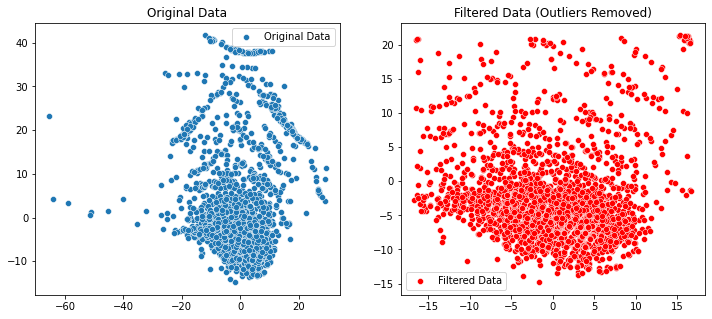

In [20]:
data_heart_mds_inliers, inliers = remove_outliers(data_heart_mds)
plot_data(data_heart_mds, data_heart_mds_inliers)


In [23]:
data_heart = data_heart.loc[inliers]
data_heart.shape # было изначально 3000 наблюдений, после удаления выбросов осталось 2632, выбросы составили чуть больше 10% всех наблдений

(2632, 22)

In [24]:
def corr_sig(df): # написали функцию для рассчета p-value
    p_matrix = np.zeros(shape=(df.shape[1], df.shape[1]))# создали матрицу из нулей,  по факту ее размерность 1*1
    for col in df.columns:
        for col2 in df.drop(col, axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2]) # Вычислили коэффициент корреляции Спирмена с соответствующим p-value
            p_matrix[df.columns.to_list().index(col), df.columns.to_list().index(col2)] = p
    return p_matrix

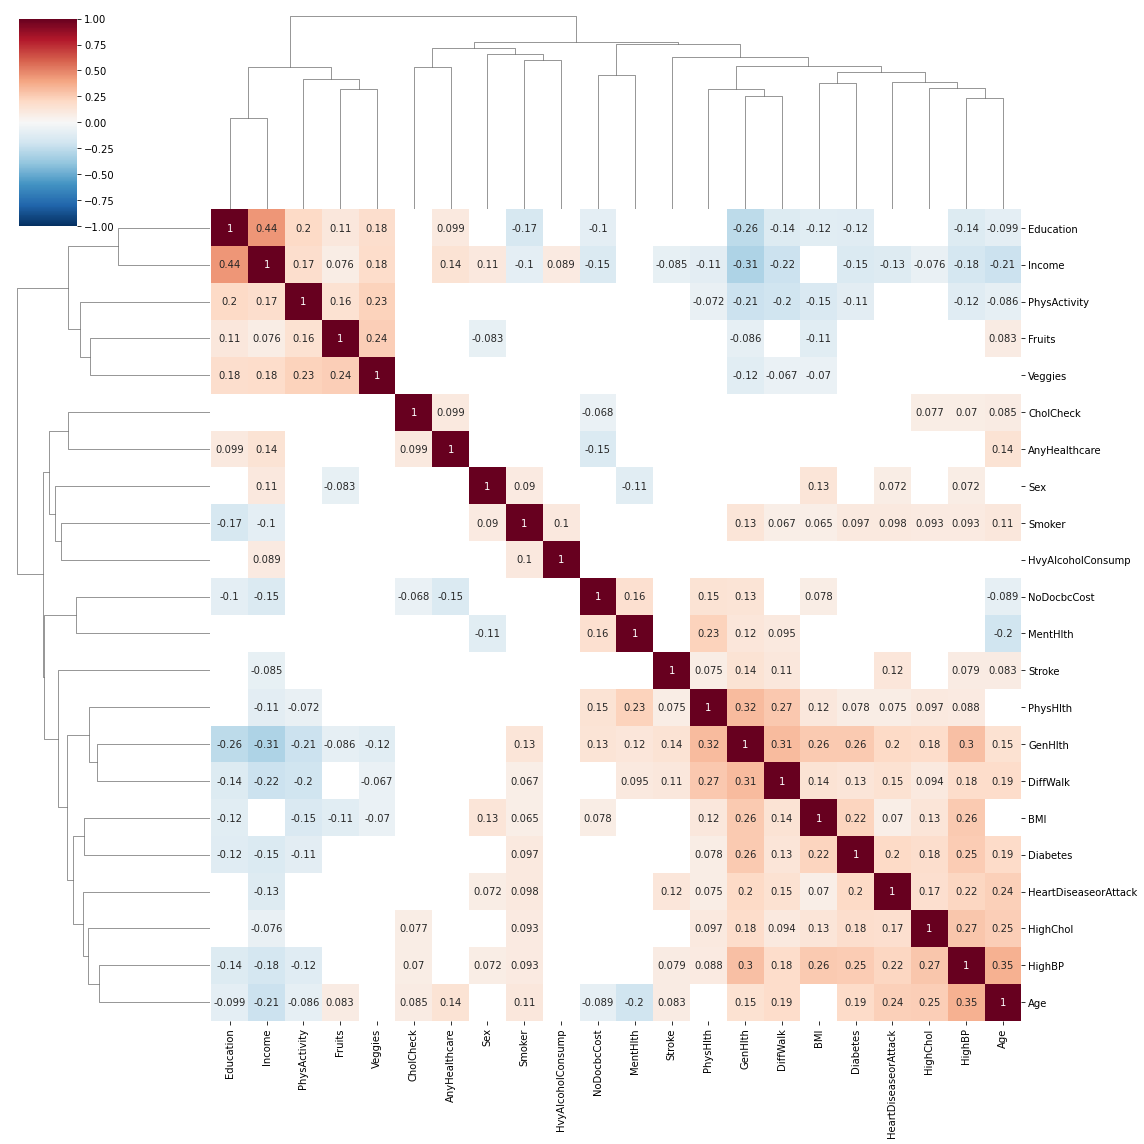

In [25]:
sns.clustermap(
    data_heart.corr(method='spearman'),
    cmap='RdBu_r',
    vmin=-1,
    vmax=1,
    annot=True,
    mask=corr_sig(data_heart) >= 0.001,
    figsize=(16, 16)
); # стоим матрицу корреляций Спирмена

Выше изображена матрица корреляций Спирмена, однако пары переменнных, для которых корреляция не значима не отображаются . Корреляция не занчима, если она меньше 0,001

HeartDiseaseorAttack имеет значимую положительную корреляцию с Age, HighBP, HighChol, Diabetes, Stroke, DiffWalk, GenHith, PhisHith, Smoker, Sex. И отрицательную коореяцию с Education и Income. Что логично: возраст  и различные проблемы со здоровьем лишь повышают вероятность сердечных заболеваний или инсультов, а образования и доход, наоборот, снижают, так как обеспечивают человеку занятость на каждый день, а следовательно и активный образ жизни, что защищает от заболеваний сердца и инсультов.

### Датасет про инсульты (stroke)
__Замечание:__ Поскольку в первом датасете все рсеспонденты в возрасте до 13 лет, мы на kaggle в этом датасете тоже отобрали детей в этом возрасте.

* Бинарные переменные: 'hypertension', 'heart_disease', 'stroke' они принимают лишь 2 значения: 0 или 1, что соответствует True или False
* Непрерывне: 'bmi', 'avg_glucose_level' это индекс массы тела и средний уровень глюкозы в крови соотвественно, они получены посредством измерений и могут принимать бесконечное количество значений
* Остальные переменные категориальные, которые определим более подробно и обработаем

In [66]:
df_stroke = pd.read_csv('full_data.csv') # скачиваем данные


display(df_stroke.describe().T) # выводим статистическую сводку (с помощью метода describe) в транспонированном виде, для удобства анализа
df_stroke.info() # выводим небольшую часть таблицы, чтоб проверить, что все сделано верно

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [67]:
for col in df_stroke.select_dtypes('object').columns: # с помощью цикла мы можем посчитать по каждому объекту сколько "случаев" на него приходится
    display(df_stroke[col].value_counts()) # сначала select_dtypes возвращает нам подмножество столбцов  на основе типов столбцов dtypes, а value_counts считает количество уникальных сзначений для каждого ряда

Female    2907
Male      2074
Name: gender, dtype: int64

Yes    3280
No     1701
Name: ever_married, dtype: int64

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

*По итогу видим, что больше задействоавано в опросе женщин, в качестве рода деятельности преобладают самозанятые (private work type), больше людей, которые проживают в городской местности, преобладают некурящие*

In [68]:
df_stroke = pd.get_dummies(
    df_stroke,
    columns=df_stroke.select_dtypes('object').columns,
    drop_first=True
) # мы перобразуем категориальные переменные в dummy variables

In [69]:
_, data_stroke = sample(df_stroke, test_size=3000, stratify=df_stroke['stroke'], random_state=2023) #  в исходном датасете уж очень много наблдений, оставим 3000 из них с помощью sample 
data_stroke.shape #  shape вернет нам кортеж с размерностью датасета, это для того, чтоб убедится, что мы обрезали данные так как и хотели

(3000, 15)

In [41]:
# Пропусков нет
data_stroke.isna().sum() # функция isna ищет пропуски в данных, функция sum суммировала бы их для получения общего количества, но пропусков в данных нет, поэтому везде стоят нули

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
ever_married_Yes                  0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

Построим диаграмму рассеяния сжатых данных с помощью многомерного шкалироования, удалим данные, которые выходят за рамки 2х стандартных отклонений хотя бы по одной MDS компоненте

In [34]:
data_stroke_mds = MDS().fit_transform(data_stroke) # MDS() делает нам многомерное шкалирование, многомерное так так  унас более 2 параметров для сравнения, а с помощью .fit_transform можно сразу и вычислить формулировку для преобразования и выполнить его.

C:\Users\halif\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [35]:
def remove_outliers(data, threshold=2): # этой функцией мы хотим найти и  удалить выбросы из данных, если z-score превышает по модулю threshold
    z_scores = np.abs(stats.zscore(data)) # стандартая функция для рассчета z-score
    inliers = (z_scores < threshold).all(axis=1)
    filtered_data = data[inliers]
    return filtered_data, inliers
# используем именно диаграмму рассеяния так как есть сопряженные числовые данные, также  зависимая переменная имеет несколько значений для каждой независимой переменной 
def plot_data(data, filtered_data): # строим две диаграммы рассеяния: для изначальных данных и преобразованных ранее
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], label='Original Data', ax=ax[0])
    ax[0].set_title('Original Data')
    sns.scatterplot(
        x=filtered_data[:, 0],
        y=filtered_data[:, 1],
        label='Filtered Data',
        color='red',
        ax=ax[1]
    ) # стандартные операции для построения графиков
    ax[1].set_title('Filtered Data (Outliers Removed)')
    plt.show()

Такую же процедуру с выбросами мы провели и на втором датасете, выводы не изменились.

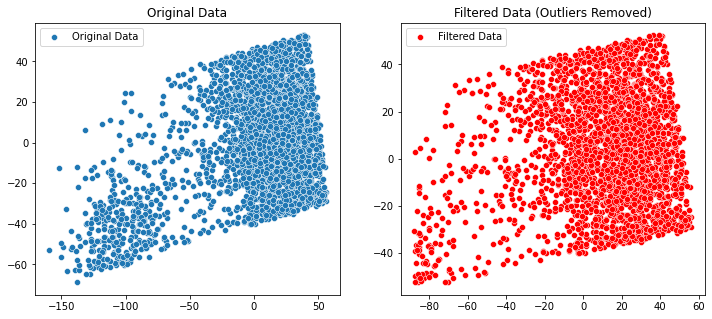

In [42]:
data_stroke_mds_inliers, inliers = remove_outliers(data_stroke_mds)
plot_data(data_stroke_mds, data_stroke_mds_inliers)


In [43]:
data_stroke = data_stroke.loc[inliers]
data_stroke.shape # было изначально 3000 наблюдений, после удаления выбросов осталось 2737, выбросы составили примерно 10% всех наблдений

(2737, 15)

In [44]:
def corr_sig(df): # написали функцию для рассчета p-value
    p_matrix = np.zeros(shape=(df.shape[1], df.shape[1])) # создали матрицу из нулей,  по факту ее размерность 1*1
    for col in df.columns:
        for col2 in df.drop(col, axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2]) # Вычислили коэффициент корреляции Спирмена с соответствующим p-value
            p_matrix[df.columns.to_list().index(col), df.columns.to_list().index(col2)] = p
    return p_matrix 

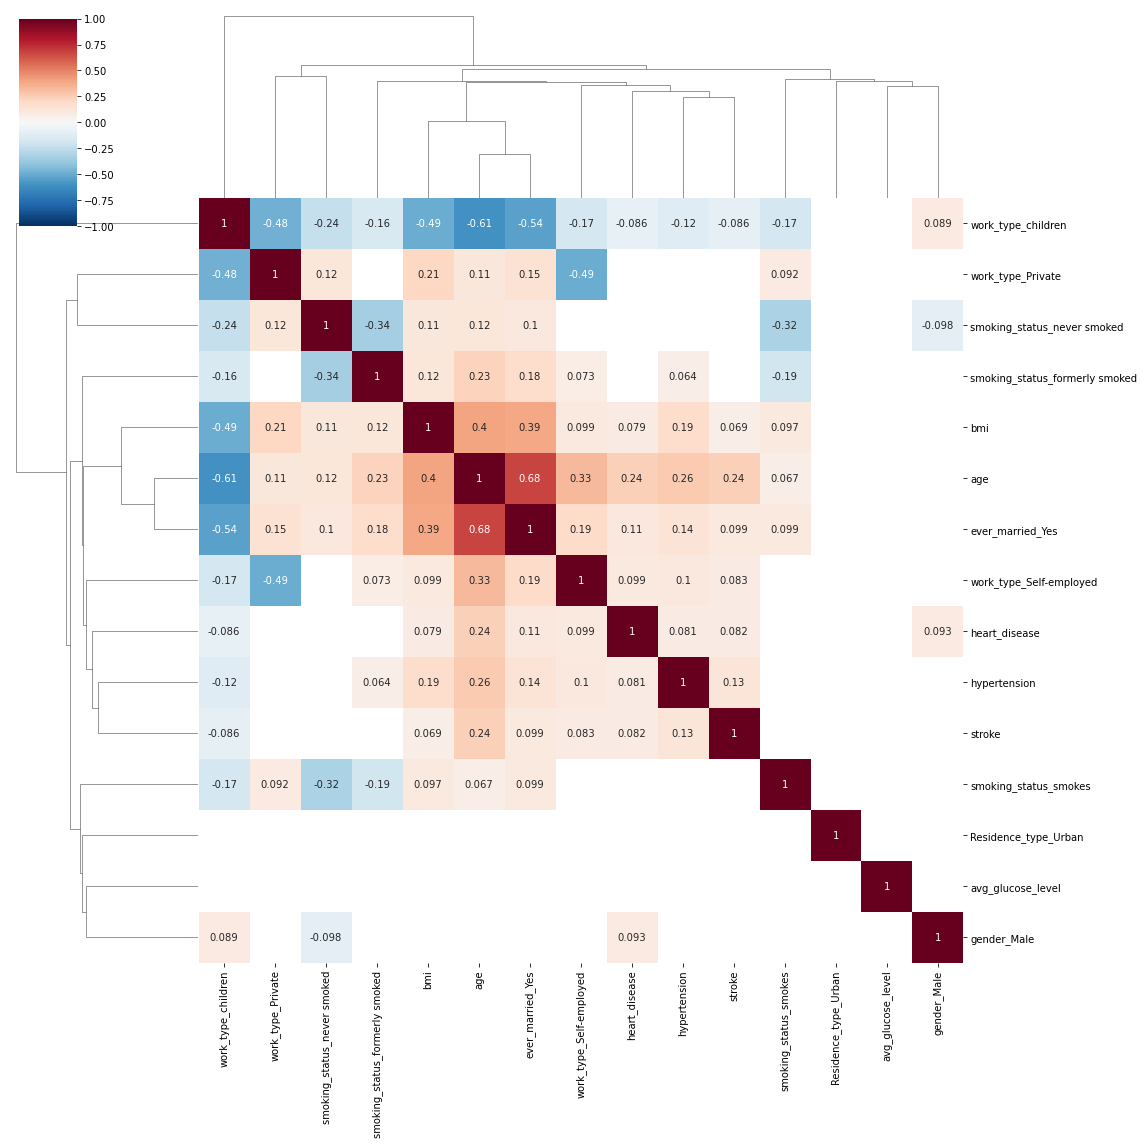

In [46]:
sns.clustermap(
    data_stroke.corr(method='spearman'),
    cmap='RdBu_r',
    vmin=-1,
    vmax=1,
    annot=True,
    mask=corr_sig(data_stroke) >= 0.001,
    figsize=(16, 16)
); # стоим матрицу корреляций Спирмена

Выше изображена матрица корреляций Спирмена, однако пары переменнных, для которых корреляция не значима не отображаются. Не значима корреляция, которая меньше 0,001

HeartDiseaseorAttack имеет значимую положительную корреляцию с гипертезией, заболеваниями сердца, фактом, возрастом, самозанятостью. И отрицательную коореяцию с работой с детьми. Что в принципе логично: люди, имеющие проблемы со здоровьем более склонны к сердечным заболеваниям или инсультам, а вот наличие работы и детей обеспечивает постоянную активность, что улучшает здоровье и снижает вероятность сердечных заболеваний и инсультов.

In [54]:
data_stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2411,60.0,0,0,87.86,29.0,0,1,1,1,0,0,0,1,0,0
2109,47.0,0,0,131.43,24.3,0,0,1,1,0,0,1,0,1,0
3906,19.0,0,0,56.33,29.4,0,1,0,1,0,0,0,0,0,0
1138,53.0,0,0,78.73,23.3,0,1,1,0,0,0,0,0,1,0
3714,41.0,0,0,92.14,29.6,0,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,50.0,0,0,62.63,23.4,0,0,1,0,1,0,1,0,1,0
1617,45.0,0,0,176.48,24.0,0,0,1,1,0,0,0,1,0,0
3540,50.0,0,1,68.09,35.5,0,0,1,0,0,0,1,0,0,1
1890,57.0,0,0,84.18,35.5,0,0,1,1,0,0,0,0,1,0


In [56]:
data_heart

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
215201,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,5.0,6.0,6.0
27524,0.0,1.0,1.0,1.0,33.0,1.0,0.0,2.0,0.0,1.0,...,1.0,1.0,5.0,5.0,10.0,1.0,1.0,4.0,2.0,6.0
149754,0.0,1.0,0.0,1.0,38.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,5.0,0.0,0.0,0.0,4.0,5.0,5.0
1436,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,4.0,6.0
206341,0.0,0.0,1.0,1.0,27.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,9.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47380,1.0,0.0,0.0,1.0,17.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,6.0,6.0
112016,0.0,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,10.0,1.0,0.0,8.0,5.0,2.0
93805,0.0,0.0,1.0,1.0,39.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,1.0,10.0,6.0,8.0
120476,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,1.0,0.0,0.0,0.0,12.0,4.0,4.0


*Использовались следующие источники информации: 
    https://docs.scipy.org/doc/scipy/reference/index.html 
        https://pandas.pydata.org/pandas-docs/stable/reference/frame.html 
            https://numpy.org/doc/stable/reference/routines.array-creation.html 
                https://runebook.dev/ru/docs/scikit_learn/modules/generated/sklearn.manifold.mds 
                    https://spec-zone.ru/scikit_learn/modules/generated/sklearn.manifold.mds*

### Проверим оба датасета на наличие некоторых закономерностей и предложим возможные гипотезы

_Над этой частью работали Халифаева Лейла и Рыбьякова Елизавета, в дальнейшем мы будем занматься проверкой гипотез и машинным обучением соответсвенно_

__Замечание:__ ниже представлены некоторые найденные закономерности и основанные на них предлагаемые гипотезы.

In [78]:
sick_stroke = data_stroke[data_stroke['stroke'] == 1]
sick_heart = data_heart[data_heart['HeartDiseaseorAttack'] == 1]   

In [79]:
display(sick_stroke.describe().T) #снова обратимся к методу describe

,count,mean,std,min,25%,50%,75%,max
age,149.0,68.557047,11.324085,32.00,59.00,72.00,78.00,82.00
hypertension,149.0,0.281879,0.451432,0.00,0.00,0.00,1.00,1.00
heart_disease,149.0,0.181208,0.386490,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,149.0,133.818725,63.349516,58.57,78.92,104.86,196.92,271.74
bmi,149.0,30.555034,5.581551,19.40,27.10,29.70,32.90,47.50
stroke,149.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
gender_Male,149.0,0.469799,0.500770,0.00,0.00,0.00,1.00,1.00
ever_married_Yes,149.0,0.879195,0.327000,0.00,1.00,1.00,1.00,1.00
work_type_Private,149.0,0.604027,0.490708,0.00,0.00,1.00,1.00,1.00
work_type_Self-employed,149.0,0.255034,0.437350,0.00,0.00,0.00,1.00,1.00


In [80]:
display(sick_heart.describe().T)

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,201.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
HighBP,201.0,0.781095,0.414537,0.0,1.0,1.0,1.0,1.0
HighChol,201.0,0.691542,0.463010,0.0,0.0,1.0,1.0,1.0
CholCheck,201.0,0.985075,0.121557,0.0,1.0,1.0,1.0,1.0
BMI,201.0,28.985075,5.363280,17.0,25.0,28.0,32.0,44.0
Smoker,201.0,0.587065,0.493591,0.0,0.0,1.0,1.0,1.0
Stroke,201.0,0.089552,0.286252,0.0,0.0,0.0,0.0,1.0
Diabetes,201.0,0.766169,0.964391,0.0,0.0,0.0,2.0,2.0
PhysActivity,201.0,0.736318,0.441729,0.0,0.0,1.0,1.0,1.0
Fruits,201.0,0.656716,0.475991,0.0,0.0,1.0,1.0,1.0


- Во-первых, мы видим, что средний индекс массы тела у "болеющих" в двух таблицах приблизительно совпадает, более того показатель около 28-29 является признаком избыточного веса.

_Теперь посмотрим на доли мужчин и женщин, и определим кто чем чаще болеет_

Text(0.5, 1.0, 'Инсульт')

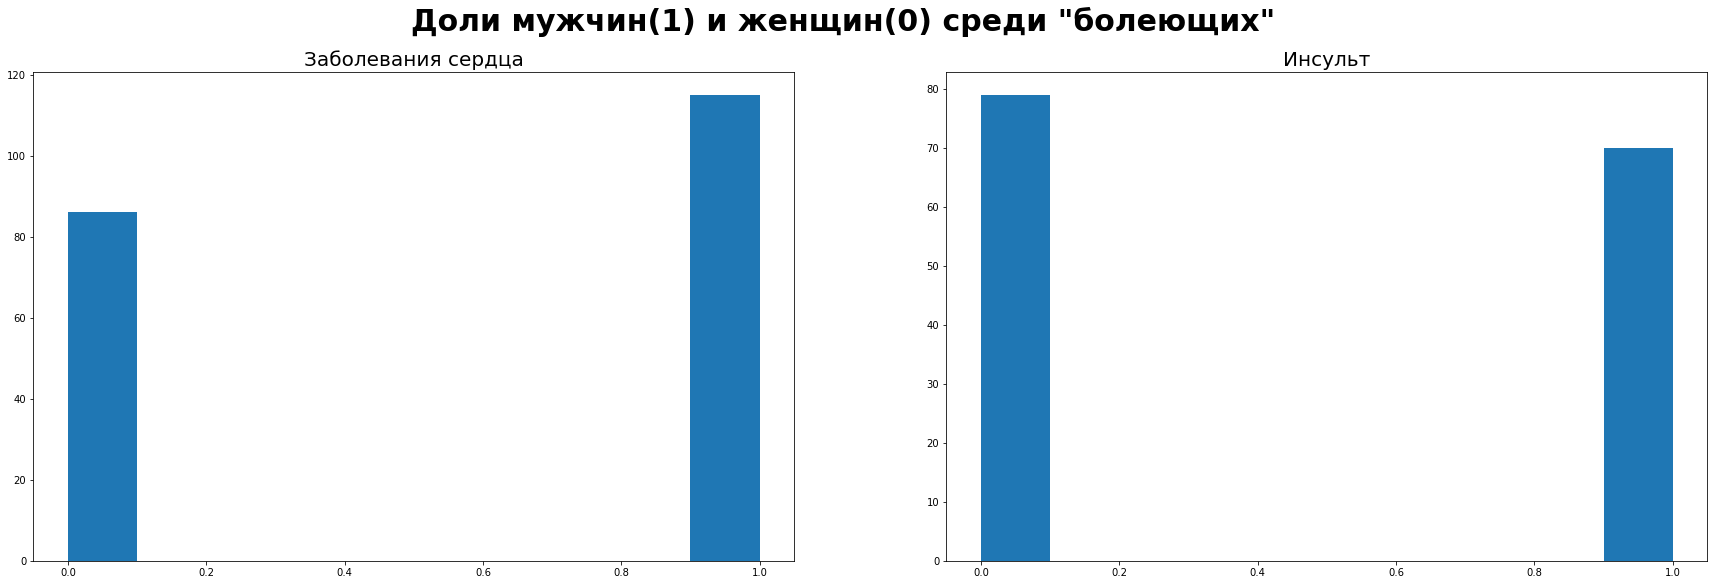

In [81]:
plt.figure(figsize=[30, 9])
plt.suptitle('Доли мужчин(1) и женщин(0) среди "болеющих"', fontsize=30, fontweight='bold')

plt.subplot(1, 2, 1)
plt.hist(sick_heart['Sex'])
plt.title('Заболевания сердца', fontsize=20)

plt.subplot(1, 2, 2)
plt.hist(sick_stroke['gender_Male'])
plt.title('Инсульт', fontsize=20)

- Во-вторых, можно сказать, что мужчины чаще сталкиваются с заболеваниями сердца, а женщины с инсультом.

_Обратим внимание теперь на курение_

In [100]:
sick_stroke['smoking_status_never smoked'].mean() # доля некурящих

0.3959731543624161

In [101]:
1 - sick_heart['Smoker'].mean() # доля некурящих

0.4129353233830846

- В-третьих, среди 'болеющих' в двух случаях можно наблюдать около 40% некурящих людей. Возможно курени и не оказывает больщого влияния.

## Дальнейшие планы:

__Что касается создания новых признаков, мы подумали о том, что логично бы было создать  следующие признаки:__

1) Дедушки-бабушки VS молодые женщины и мужчины: так как пожилые люди склонны иметь высокое артериальное давление, лишний вес, повышенный холестерин, диабет, они также не работают, меньше занимаются спортом, скорее всего имеют детей и были когда-либо женаты. Мы попробуем это проверить на наших данных и поделить людей на пожилых и молодых

2) Также по "анализам" можно предположить следит ли за здоровьем человек (занимается ли спортом, питается ли правильно, ходит ли к врачам): У нас есть какие-то отдельные переменные, говорящие об этом типо health_care_check или smoker, но мы хотели бы это объединить и посмотреть на картину в целом, чтобы потом понять какие показатели болезни сердца и инсульта будут у здоровых и нездоровых людей 

__Гипотезы:__
1) Построим гистограмму, чтоб понять распределение возраст - число заболевших: Поскольку в одном из датасетов переменная возраст закодирована от 1 до 13, мы применим такое же преобразование и ко второй и попробуем выявить закономерность. Также попробуем найти взаимосвязи и позже проверить гипотезы:

    - С возрастом количеством болезней сердца/ инсульта увеличиваются
    - Чем больше масса тела, тем больше вероятность возникновения болезней сердца/ инсульта 
    
    
2) Для dummy variables и непрерывных переменных: Мы будем также смотреть на среднее, чтобы построить ДИ для разности мат ожиданий тех, кто имел и не имел болезнь сердца/инсульт и уже основываясь на этом проверим возникшие гипотезы


__Машинное обучение:__

Мы поделим данные на трейн и тест, учитывая то, что их необходимо стратифицировать по heart_disease или stroke, 
чтобы модель не переобучилась/ не недоучилась и показала адекватный скор
    
1) Мы хотим построить линейную регрессию, чтобы понять какой фактор влияет больше всего  на болезнь сердца (heart_disease, датасет 1) и на инсульт (stroke, датасет 2) 

А вдруг вес будет самый большой как раз у этих факторов (то есть инсульт у болезни сердца и болезнь сердца у инсульта).
Или у одинаковых факторов типо IBM, высокого холестерина или курения. Было бы круто! 
Также если вес при независимой переменной будет очень мальньким, мы сможем ее убрать (например, если увидим, что семейное положение никак или очень слабо влияет на болезнь сердца/инсульт в нашей регрессии)


2) Мы также хотим при помощи логистической регрессии предсказать инсульт и болезнь сердца на этих двух датасетах, 
чтобы понять с какими факторами скор будет лучше и при каких хуже. Также уберем менее влияющие. Для этого мы будем использовать различные метрики (Roc_auc, precision, recall, accuracy). Подберем по сетке наилучшие гиперпараметры (penalty, solver, C), попробуем улучшить наш скор при помощи использования  другого классификатора - соседей или же других моделей -  леса или же бустинга.

